In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from scipy.stats import median_abs_deviation
from sklearn import metrics
from pyod.models.pca import PCA
from pyod.utils.data import generate_data

In [23]:
data = pd.read_csv('freezerdata_clean_outliers.csv', index_col=0)
data = data.interpolate(method='linear', limit_direction='forward', axis=0)
data = data.copy()[1:]

In [24]:
X_train_pd = data.iloc[:, 2:]
X_train = X_train_pd.to_numpy()

y_trian = data.loc[:, 'Outlier']

In [25]:
X_test_pd = X_train_pd.copy()[2000:2500]
X_test = X_test_pd.to_numpy()

In [26]:
pca = PCA(contamination=0.05)
pca.fit(X_train)

PCA(contamination=0.05, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [27]:
y_train_pred = pca.labels_
y_train_scores = pca.decision_scores_
y_train_scores = pca.decision_function(X_train)
y_train_pred = pca.predict(X_train)

y_test_scores = pca.decision_function(X_test)
y_test_pred = pca.predict(X_test)

In [28]:
y_test_pred = pca.predict(X_test) 
y_test_scores = pca.decision_function(X_test)

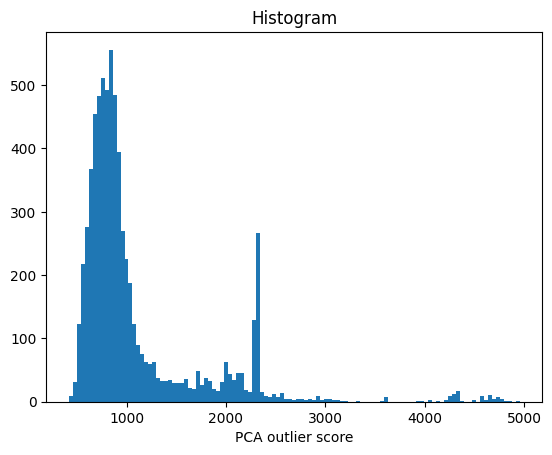

In [29]:
plt.hist(y_train_scores, bins='auto')
plt.title("Histogram")
plt.xlabel('PCA outlier score')
plt.show()

In [30]:
cm = metrics.confusion_matrix(y_trian, y_train_pred)

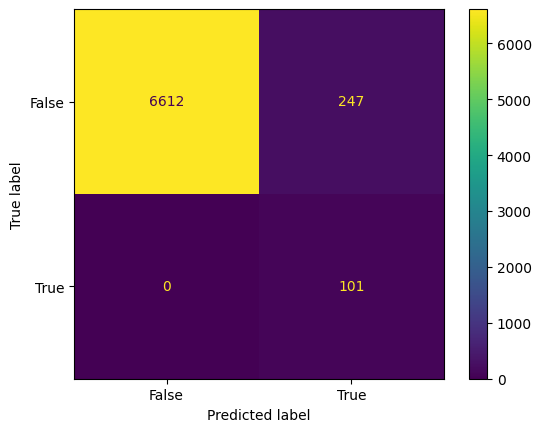

In [31]:
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels = [False, True]).plot()
cm_display

In [32]:
accuracy = metrics.accuracy_score(y_trian, y_train_pred)
accuracy

0.9645114942528735

In [33]:
check = pca.predict(X_test)

check_pred = X_test_pd.copy()
check_pred['prediction'] = check

In [34]:
check_pred['correct'] = np.where(check_pred['Outlier'] == check_pred['prediction'], True, False)

In [35]:
check_pred

,EnergyKWh,Environment,HotGasPipe,LiquidPipe,Refrigerated,SuctionPipe,Time,Outlier,prediction,correct
2001,2300.000000,21.5,42.6,29.0,0.2,8.6,2001,0,0,True
2002,2200.000000,21.4,39.7,28.6,0.4,9.7,2002,0,0,True
2003,2100.000000,21.4,37.0,28.2,0.4,10.6,2003,0,0,True
2004,2000.000000,21.4,35.0,28.1,0.7,11.5,2004,0,0,True
2005,1900.000000,21.3,33.2,27.7,0.8,12.3,2005,0,0,True
...,...,...,...,...,...,...,...,...,...,...
2496,333.333333,22.6,31.8,27.5,-0.6,12.0,2496,0,0,True
2497,150.000000,22.6,30.4,27.1,-0.3,12.9,2497,0,0,True
2498,150.000000,22.6,29.6,27.2,-0.2,13.7,2498,0,0,True
2499,150.000000,22.6,28.9,26.9,-0.1,14.4,2499,0,0,True


In [36]:
fig = px.scatter(check_pred, x='Refrigerated', y='SuctionPipe', color='correct')
fig.show()

Drastically change contamination rate

In [43]:
pca = PCA(contamination=0.4)
pca.fit(X_train)

y_train_pred = pca.labels_
y_train_scores = pca.decision_scores_
y_train_scores = pca.decision_function(X_train)
y_train_pred = pca.predict(X_train)

y_test_scores = pca.decision_function(X_test)
y_test_pred = pca.predict(X_test)

y_test_pred = pca.predict(X_test) 
y_test_scores = pca.decision_function(X_test)

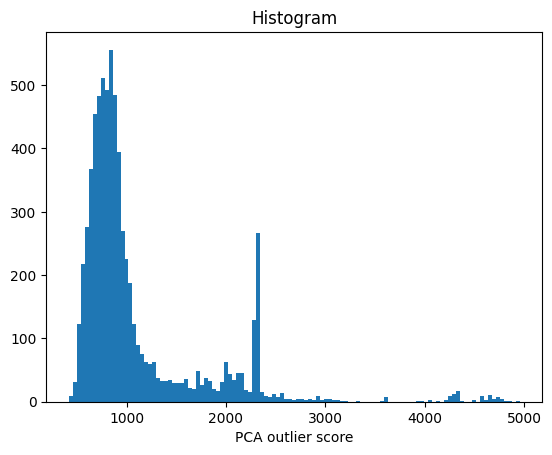

In [44]:
plt.hist(y_train_scores, bins='auto')
plt.title("Histogram")
plt.xlabel('PCA outlier score')
plt.show()

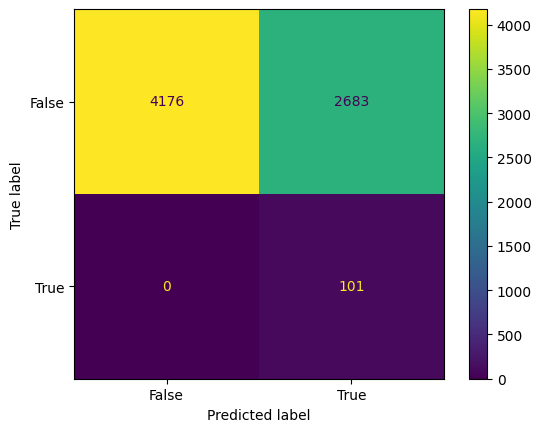

In [45]:
cm = metrics.confusion_matrix(y_trian, y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels = [False, True]).plot()
cm_display

In [46]:
accuracy = metrics.accuracy_score(y_trian, y_train_pred)
accuracy

0.6145114942528735

In [47]:
check = pca.predict(X_test)

check_pred = X_test_pd.copy()
check_pred['prediction'] = check

check_pred['correct'] = np.where(check_pred['Outlier'] == check_pred['prediction'], True, False)

In [48]:
fig = px.scatter(check_pred, x='Refrigerated', y='SuctionPipe', color='correct')
fig.show()